<a href="https://colab.research.google.com/github/kAi3345/Dark-Matter/blob/main/Fitting_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [7]:
dat = astropy.io.ascii.read("Tonry_2003.vot")
distance = 10**dat["col8"] / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [27]:
x = distance.to(u.mpc).value
ind = np.where((x > 0) & (x < 300))
x = velocity.to(u.km / u.s).value[ind]
y = distance.to(u.mpc).value[ind]
yerr = distance_error.to(u.mpc).value[ind]



In [28]:
matrix = np.vander(x, 2)
diagonalMatrix = np.diag(yerr * yerr)
transposeMatrix  = np.dot(matrix.T, matrix / (yerr**2)[:, None])
cov = np.linalg.inv(transposeMatrix)
parameter = np.linalg.solve(transposeMatrix, np.dot(matrix.T, y / yerr**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(parameter[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(parameter[1], np.sqrt(cov[1, 1])))

Least-squares estimates:
m = 0.015 ± 0.000
b = -6.354 ± 0.225


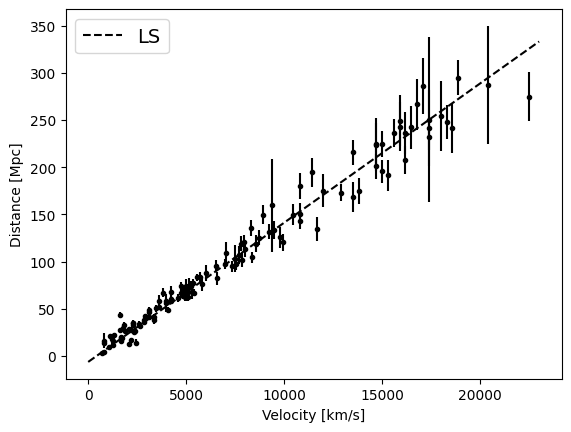

In [40]:
x0 = np.linspace(0, 23000, 300)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, np.dot(np.vander(x0, 2), parameter), "--k", label="LS")
plt.legend(fontsize=14)
plt.ylabel("Distance [Mpc]")
plt.xlabel("Velocity [km/s]");

In [41]:
x = distance.to(u.mpc).value
ind = np.where((x > 1000) & (x < 2000))
x = velocity.to(u.km / u.s).value[ind]
y = distance.to(u.mpc).value[ind]
yerr = distance_error.to(u.mpc).value[ind]

In [42]:
matrix = np.vander(x, 2)
diagonalMatrix = np.diag(yerr * yerr)
transposeMatrix  = np.dot(matrix.T, matrix / (yerr**2)[:, None])
cov = np.linalg.inv(transposeMatrix)
parameter = np.linalg.solve(transposeMatrix, np.dot(matrix.T, y / yerr**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(parameter[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(parameter[1], np.sqrt(cov[1, 1])))

Least-squares estimates:
m = 0.011 ± 0.002
b = 517.927 ± 245.094


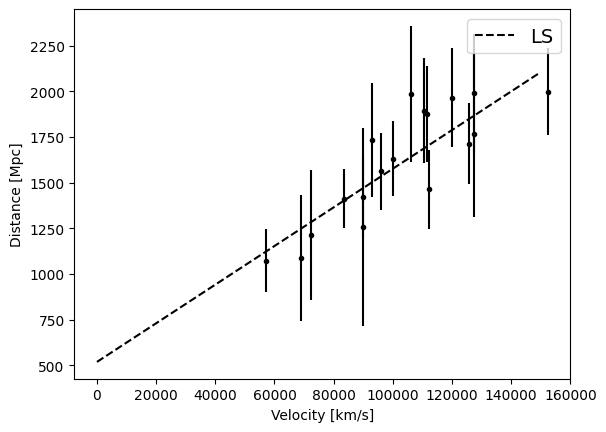

In [53]:
x0 = np.linspace(0, 150000, 700)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, np.dot(np.vander(x0, 2), parameter), "--k", label="LS")
plt.legend(fontsize=14)
plt.ylabel("Distance [Mpc]")
plt.xlabel("Velocity [km/s]");